In [1]:
import os
import sys
import warnings

import numpy as np

import pandas as pd
import statsmodels.formula.api as smf
from IPython.core.display import HTML
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Data Cleaning 

In [2]:
df = pd.read_csv('berlin_raw.csv')
print(df.shape)   
df.head()  

(14274, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20250923202926,2025-09-24,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/hosting/Hosti...,3718,...,4.70,4.92,4.61,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.76
1,9991,https://www.airbnb.com/rooms/9991,20250923202926,2025-09-24,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.06
2,14325,https://www.airbnb.com/rooms/14325,20250923202926,2025-09-24,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.85,4.60,4.45,NaN,f,4,4,0,0,0.14
3,17904,https://www.airbnb.com/rooms/17904,20250923202926,2025-09-24,city scrape,Beautiful Kreuzberg studio - 3 months minimum,"- apt is available starting October 1, 2025 (m...","The apartment is located in Kreuzberg, which i...",https://a0.muscache.com/pictures/d9a6f8be-54b9...,68997,...,4.92,4.88,4.65,NaN,f,1,1,0,0,1.57
4,20858,https://www.airbnb.com/rooms/20858,20250923202926,2025-09-24,city scrape,Designer Loft in Berlin Mitte,Bright and sunny condo with two balconies in a...,Fantastic vibe in the middle of the popular Ka...,https://a0.muscache.com/pictures/108232/205b19...,71331,...,4.54,4.91,4.39,03/Z/RA/009767-24,f,1,1,0,0,0.89


In [3]:
df = df.drop(columns=["id", "listing_url", "scrape_id", "last_scraped", "picture_url",
                      "host_picture_url", "host_url", "host_name", "calendar_last_scraped", "host_thumbnail_url"])
print(df.shape)      


(14274, 69)


In [4]:
# Drop rows where 'price' is NaN
df = df.dropna(subset=['price'])
print(df.shape)

(9264, 69)


In [5]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


calendar_updated               9264
host_neighbourhood             6039
neighbourhood                  5091
neighborhood_overview          5091
host_about                     4197
host_location                  2274
review_scores_cleanliness      2070
review_scores_accuracy         2070
review_scores_checkin          2070
first_review                   2070
reviews_per_month              2070
review_scores_value            2070
review_scores_communication    2070
last_review                    2070
review_scores_location         2070
review_scores_rating           2070
license                        1909
host_response_rate             1178
host_response_time             1178
host_acceptance_rate           1041
description                     346
host_is_superhost               140
has_availability                135
bedrooms                         46
bathrooms_text                   15
beds                              9
maximum_maximum_nights            5
bathrooms                   

In [6]:
df = df.drop(columns=["calendar_updated", "neighbourhood_group_cleansed", "license","host_neighbourhood", "host_about", 
                      "neighborhood_overview", "neighbourhood", "host_location"])
print(df.shape)      


(9264, 61)


In [7]:
df["price"] = (
    df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
)


In [8]:
df["price"].describe()

count     9264.000000
mean       201.240393
std       1656.989769
min          5.000000
25%         70.000000
50%        104.000000
75%        160.000000
max      50000.000000
Name: price, dtype: float64

In [9]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


review_scores_cleanliness      2070
review_scores_checkin          2070
review_scores_communication    2070
review_scores_location         2070
reviews_per_month              2070
review_scores_value            2070
review_scores_rating           2070
review_scores_accuracy         2070
last_review                    2070
first_review                   2070
host_response_rate             1178
host_response_time             1178
host_acceptance_rate           1041
description                     346
host_is_superhost               140
has_availability                135
bedrooms                         46
bathrooms_text                   15
beds                              9
maximum_maximum_nights            5
bathrooms                         5
minimum_minimum_nights            5
maximum_minimum_nights            5
minimum_maximum_nights            5
host_identity_verified            2
host_total_listings_count         2
host_listings_count               2
host_since                  

In [10]:
cols_with_missing = [
    "has_availability",
    "beds",
    "bedrooms",
    "host_has_profile_pic",
    "host_verifications",
    "host_total_listings_count",
    "host_listings_count",
    "host_since",
    "host_identity_verified",
    "bathrooms",
    "bathrooms_text"
]

df = df.dropna(subset=cols_with_missing)
print(df.shape) 

(9057, 61)


In [11]:
# Handle missing values in review and host features
# 1. Reviews - create flag FIRST
df['has_reviews'] = df['review_scores_rating'].notna().astype(int)

# 2. Fill review scores with median OF EXISTING REVIEWS
review_cols = ['review_scores_rating', 'review_scores_accuracy', 
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 
               'review_scores_value']

for col in review_cols:
    median_score = df[df[col].notna()][col].median()
    df[col] = df[col].fillna(median_score)

# 3. Reviews per month = 0 for no reviews
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 4. Host features - median
df["host_response_rate"] = (
    df["host_response_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)

df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df["host_acceptance_rate"] = (
    df["host_acceptance_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [12]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


first_review              1900
last_review               1900
host_response_time        1070
description                275
host_is_superhost          140
maximum_minimum_nights       5
minimum_minimum_nights       5
maximum_maximum_nights       5
minimum_maximum_nights       5
dtype: int64

In [13]:
df["host_response_time"].value_counts(dropna=False)


host_response_time
within an hour        5082
within a few hours    1293
within a day          1219
NaN                   1070
a few days or more     393
Name: count, dtype: int64

In [14]:
host_response_dummies = pd.get_dummies(
    df["host_response_time"],
    prefix="host_response_time"
)

df = pd.concat([df, host_response_dummies], axis=1)
for col in host_response_dummies.columns:
    df[col] = df[col].astype(int)


In [15]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)


In [16]:
df["host_is_superhost"] = df["host_is_superhost"].fillna("f")
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})


In [17]:
df["first_review"] = pd.to_datetime(df["first_review"], errors="coerce")
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


In [18]:
reference_date = df["last_review"].max()


In [19]:
df["days_since_first_review"] = (reference_date - df["first_review"]).dt.days
df["days_since_last_review"] = (reference_date - df["last_review"]).dt.days


In [20]:
max_days = df["days_since_first_review"].max()

df["days_since_first_review"] = df["days_since_first_review"].fillna(max_days + 1)
df["days_since_last_review"] = df["days_since_last_review"].fillna(max_days + 1)

In [21]:
df = df.drop(columns=["first_review", "last_review"])
df.head() 


,source,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,host_response_time_a_few_days_plus,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,days_since_first_review,days_since_last_review
0,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,3718,2008-10-19,within a day,100.0,83.0,0,1.0,...,0,0,0.76,1,0,1,0,0,5939.0,45.0
1,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,33852,2009-08-25,a few days or more,20.0,0.0,0,1.0,...,0,0,0.06,1,1,0,0,0,3698.0,2089.0
2,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,55531,2009-11-18,within a day,80.0,22.0,0,4.0,...,0,0,0.14,1,0,1,0,0,5565.0,663.0
3,city scrape,Beautiful Kreuzberg studio - 3 months minimum,"- apt is available starting October 1, 2025 (m...",68997,2010-01-08,within an hour,100.0,95.0,0,2.0,...,0,0,1.57,1,0,0,0,1,5696.0,21.0
4,city scrape,Designer Loft in Berlin Mitte,Bright and sunny condo with two balconies in a...,71331,2010-01-18,within an hour,100.0,96.0,0,3.0,...,0,0,0.89,1,0,0,0,1,4738.0,69.0


## Features Extraction

In [22]:
# Amenity feature engineering
import unicodedata
import re

# 1) Clean and normalize the amenities column
#    - Convert to string
#    - Normalize unicode (e.g. \u2019 → ')
#    - Lowercase everything
#    - Remove brackets and quotes
#    - Replace separators with spaces
df["amenities_clean"] = (
    df["amenities"]
        .fillna("")
        .astype(str)
        .apply(lambda x: unicodedata.normalize("NFKD", x))
        .str.lower()
        .str.replace(r"[\[\]\{\}\"]", "", regex=True)  # remove brackets & quotes
        .str.replace(r"[_/]", " ", regex=True)        # normalize separators
)

# 2) Define robust regex patterns for amenities
#    - Patterns are flexible to wording variations
amenity_patterns = {
    "kitchen": r"\bkitchen\b",
    "hair_dryer": r"hair\s*dryer",
    "hot_water": r"hot\s*water",
    "wifi": r"wi[\s\-]?fi|internet|ethernet",
    "fast_wifi": r"fast\s*wi[\s\-]?fi",
    "iron": r"\biron\b",
    "heating": r"heating|radiant\s*heating|central\s*air",
    "washer": r"washer|washing\s*machine",
    "dryer": r"dryer",
    "refrigerator": r"refrigerator|fridge",
    "freezer": r"\bfreezer\b",
    "oven": r"\boven\b|baking\s*sheet",
    "stove": r"stove|cooktop|induction\s*stove",
    "microwave": r"microwave",
    "dishwasher": r"dishwasher",
    "coffee": r"coffee|coffee\s*maker|nespresso|espresso|pour[-\s]?over",
    "kettle": r"kettle",
    "tv": r"\btv\b|television|hdtv",
    "wine_glasses": r"wine\s*glasses?",
    "bathtub": r"bathtub|bath\s*tub",
    "shampoo": r"shampoo",
    "conditioner": r"conditioner",
    "soap": r"soap|shower\s*gel|body\s*soap",
    "cleaning_products": r"cleaning\s*products?",
    "first_aid_kit": r"first\s*aid",
    "smoke_alarm": r"smoke\s*alarm",
    "carbon_monoxide_alarm": r"carbon\s*monoxide",
    "fire_extinguisher": r"fire\s*extinguisher",
    "balcony": r"balcony",
    "workspace": r"workspace|desk",
    "books": r"books?|reading\s*material",
    "board_games": r"board\s*games?",
    "elevator": r"elevator|lift",
    "parking": r"parking",
    "self_checkin": r"self[\s\-]?check[\s\-]?in|lockbox",
    "pets_allowed": r"pets?\s*allowed",
    "security": r"security|safe",
    "dining_table": r"dining\s*table",
    "outdoor_dining": r"outdoor\s*dining",
    "toaster": r"toaster",
    "netflix": r"netflix",
}

# 3) Create amenity dummy variables
#    - 1 if amenity is present, 0 otherwise
for amenity, pattern in amenity_patterns.items():
    df[f"amenity_{amenity}"] = (
        df["amenities_clean"]
        .str.contains(pattern, regex=True)
        .astype(int)
    )

# 4) (Optional but useful) Overall amenity richness score
amenity_cols = [c for c in df.columns if c.startswith("amenity_")]
df["amenities_score"] = df[amenity_cols].sum(axis=1)


In [23]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['days_since_hosting'] = (reference_date - df['host_since']).dt.days

In [24]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].map({"t": 1, "f": 0})
df["host_identity_verified"] = df["host_identity_verified"].map({"t": 1, "f": 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})


In [25]:
categorical_cols = [
    "room_type",
    "property_type",
    "neighbourhood_cleansed",
    "host_verifications"
]

for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1) 


In [26]:
Berlin_CENTER_LAT = 48.208174
Berlin_CENTER_LON = 16.373819
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c
df['distance_to_center'] = haversine(
    df['latitude'], df['longitude'], Berlin_CENTER_LAT, Berlin_CENTER_LON
)

In [27]:
# Drop price outliers
df = df[df['price'] <= 1000]

In [28]:
df.columns = df.columns.str.replace("/", "", regex=False)

In [29]:
df.columns = (
    df.columns
      .str.normalize("NFKD")          # normalize unicode
      .str.encode("ascii", "ignore")  # drop non-ascii chars
      .str.decode("utf-8")
      .str.replace(r"[^0-9a-zA-Z_]", "_", regex=True)
)

## Data Visualization

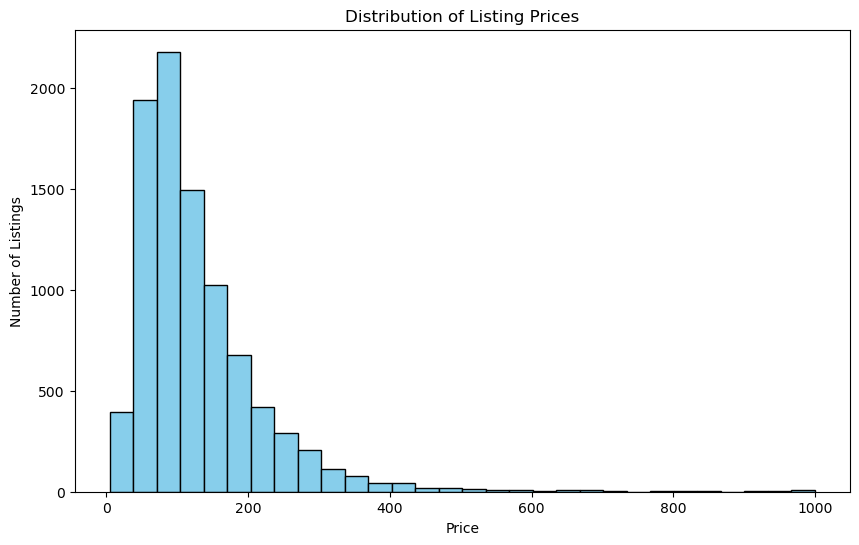

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

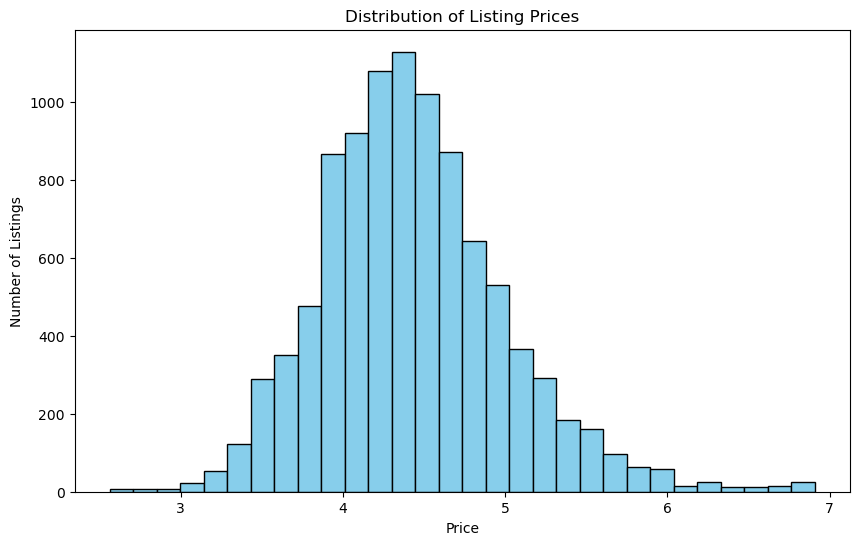

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df["price"]), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Price Distribution by Room Type')

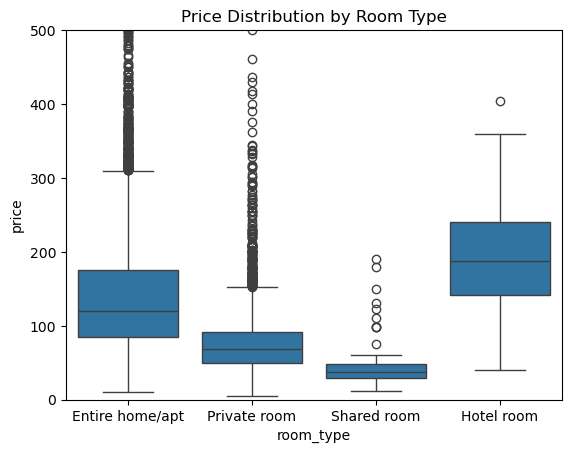

In [31]:
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")

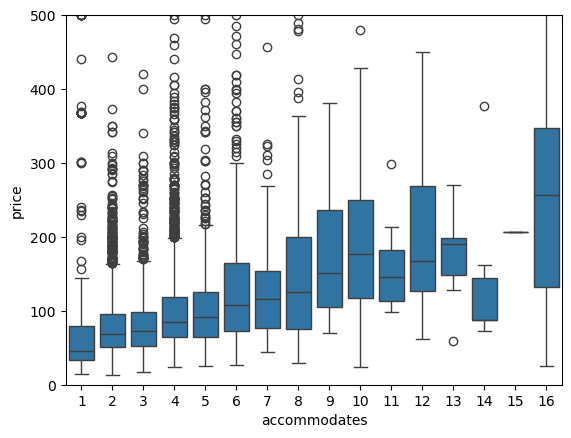

In [33]:
sns.boxplot(data = df, x = 'accommodates', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

Text(0.5, 1.0, 'Number of Listings by Neighborhood')

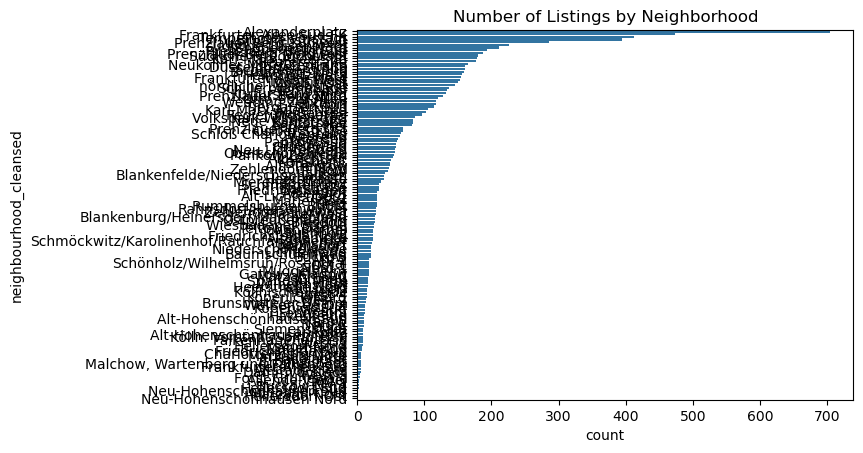

In [32]:
sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index)
plt.title("Number of Listings by Neighborhood")

Text(0.5, 1.0, 'Host Response Time Distribution')

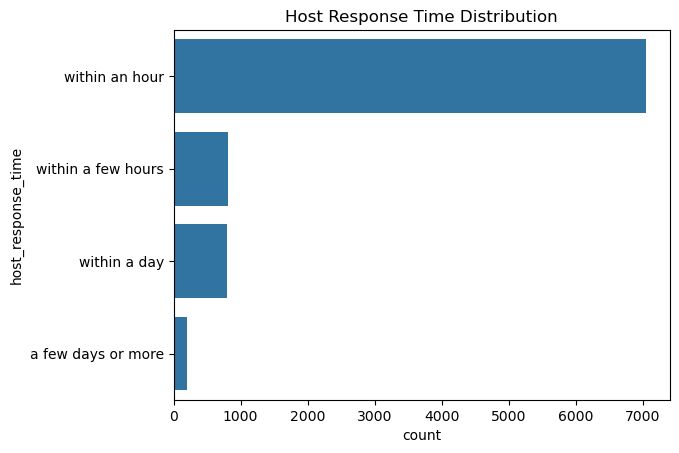

In [35]:
sns.countplot(y='host_response_time', data=df, order=df['host_response_time'].value_counts().index)
plt.title("Host Response Time Distribution")

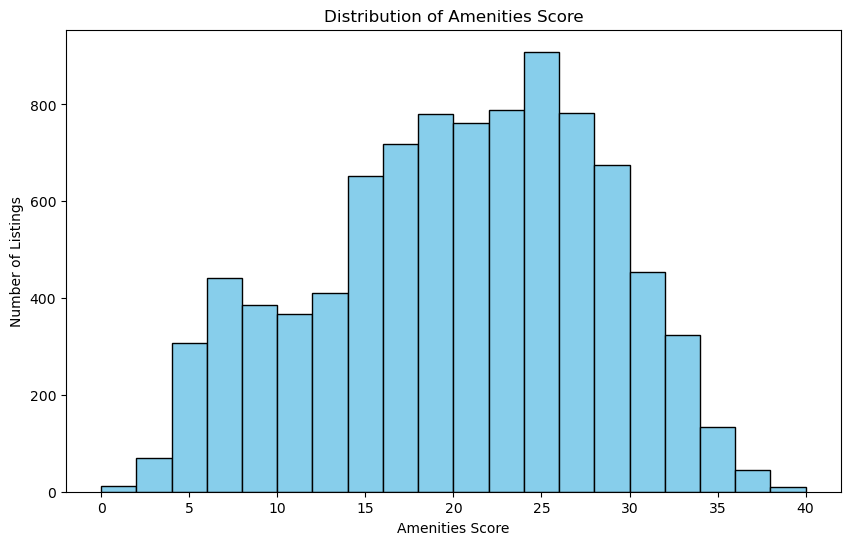

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df["amenities_score"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Amenities Score")
plt.xlabel("Amenities Score")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Host Verifications')

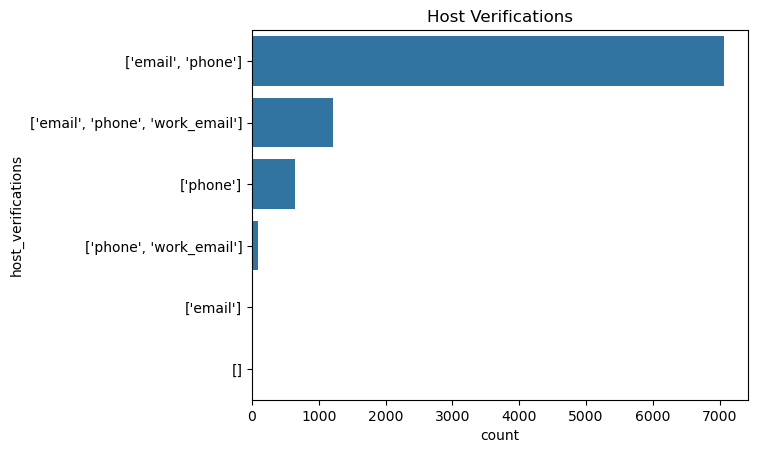

In [34]:
sns.countplot(y='host_verifications', data=df, order=df['host_verifications'].value_counts().index)
plt.title("Host Verifications")

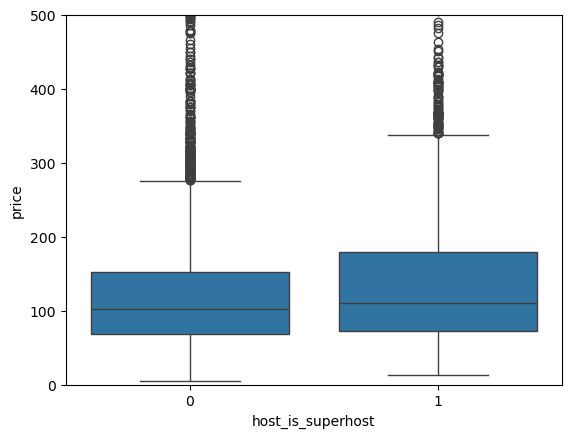

In [35]:
sns.boxplot(data = df, x = 'host_is_superhost', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

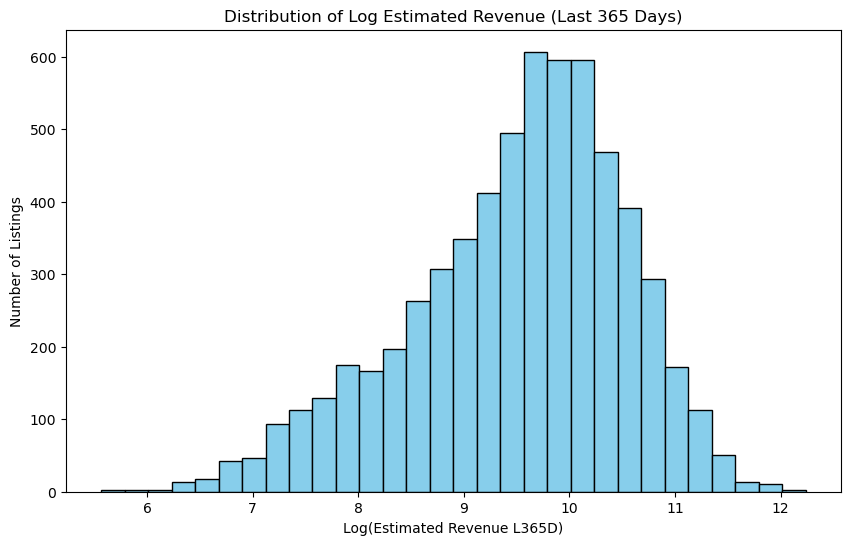

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(
    np.log1p(df.loc[df["estimated_revenue_l365d"] > 0, "estimated_revenue_l365d"]),
    bins=30,
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribution of Log Estimated Revenue (Last 365 Days)")
plt.xlabel("Log(Estimated Revenue L365D)")
plt.ylabel("Number of Listings")
plt.show()


In [38]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)
df.to_csv("berlin_cleaned_.csv", index=False)
